In [ ]:
import pandas as pd
import numpy as np

In [ ]:
attrition = pd.read_csv("/projects/cmpt889/uc3/Attrition - Data.csv")
display(attrition.head())
print(attrition.shape)

,New_ID,Month,Txn,Status,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score
0,nkm3976380x,201801,3.0,Active,1982.0,1.0,No,1.0,1.0,28.0,752.0
1,vaq3809068l,201801,3.0,Active,252.0,1.0,No,1.0,1.0,59.0,752.0
2,cct6576683l,201801,1.0,Active,1121.0,2.0,No,1.0,1.0,56.0,766.0
3,bia259326m,201801,5.0,Active,2255.0,3.0,No,0.0,1.0,21.0,698.0
4,wac199225k,201801,0.0,Active,927.0,2.0,No,1.0,0.0,30.0,810.0


(499296, 11)


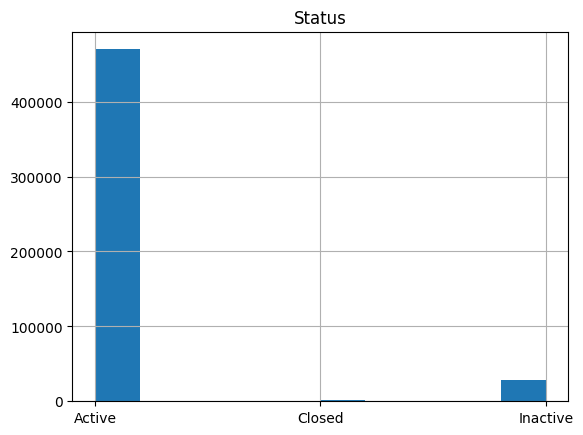

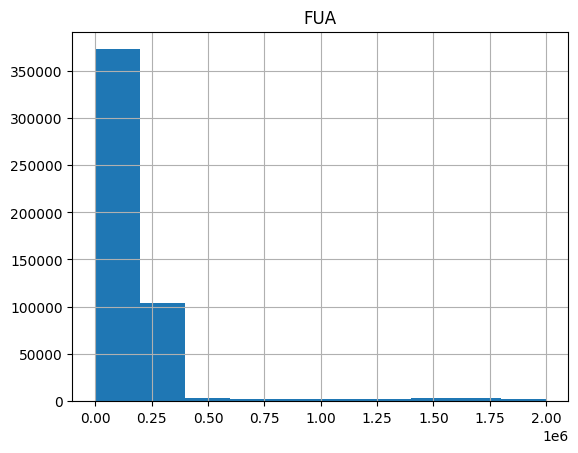

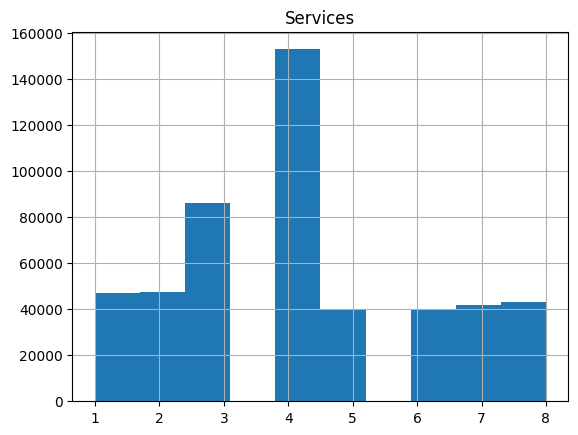

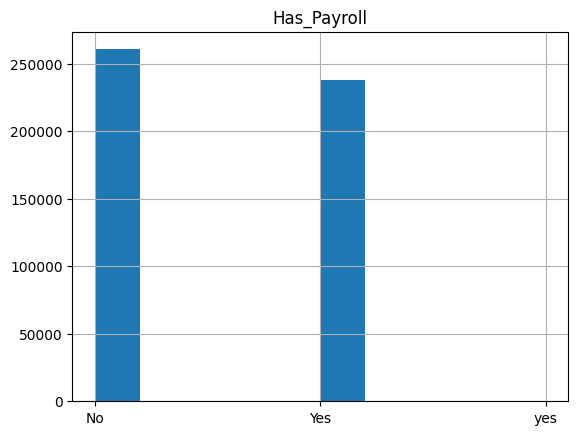

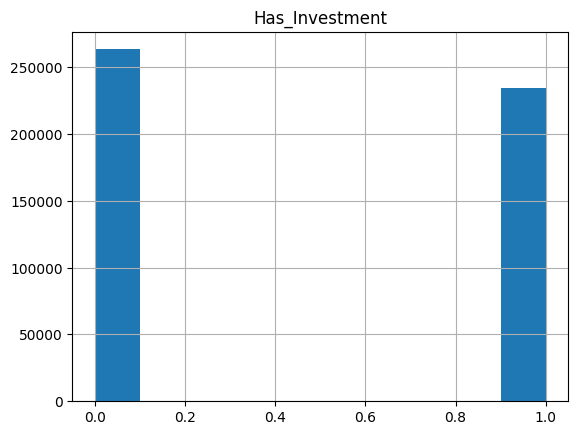

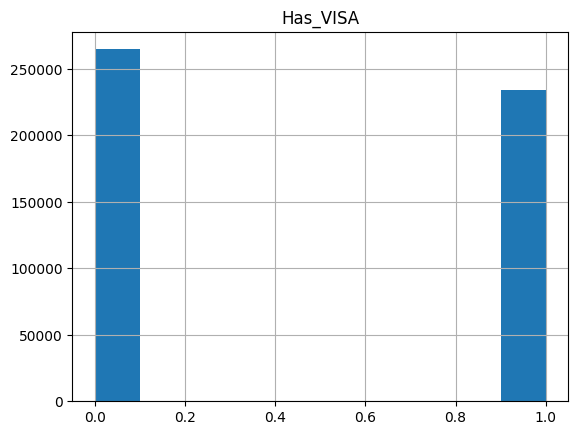

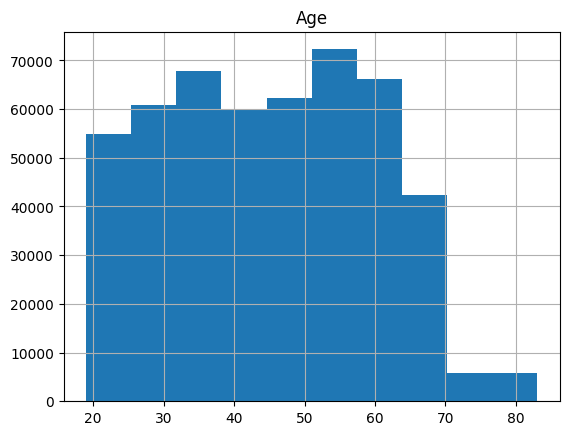

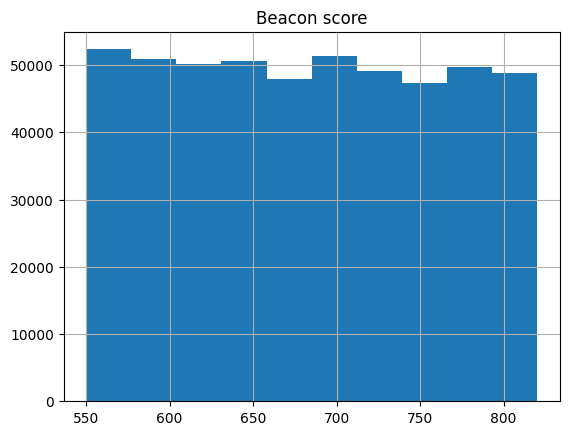

In [ ]:
# For each column in the dataset, plot the distribution of the values in the column.
import matplotlib.pyplot as plt
for column in attrition.columns[3:len(attrition.columns)]:
    attrition[column].hist()
    plt.title(column)
    plt.show()

In [ ]:
attrition = pd.read_csv("/projects/cmpt889/uc3/Attrition - Data.csv")

attrition.loc[attrition['Has_Payroll'] == "Yes", "Has_Payroll"] = 1
attrition.loc[attrition['Has_Payroll'] == "yes", "Has_Payroll"] = 1
attrition.loc[attrition['Has_Payroll'] == "No", "Has_Payroll"] = 0

In [ ]:
inactive_ids = attrition.loc[attrition['Status'] == "Inactive", "New_ID"].unique().tolist()
closed_ids = attrition.loc[attrition['Status'] == "Closed", "New_ID"].unique().tolist()
inactive_closed_ids = inactive_ids + closed_ids
active_ids = [id for id in attrition["New_ID"].unique().tolist() if id not in inactive_closed_ids]

print(len(active_ids))
print(len(inactive_ids))
print(len(closed_ids))

8776
1575
51


In [ ]:
attrition2 = attrition.copy()
attrition2['churn_next_month'] = 0
# For each inactive_id in inactive_ids, remove the most recent 12 rows that were labeled 'Active' before the row labeled 'Inactive'. And then, assign the value 1 to the column 'churn_next_month' for the last 'Active' row. Attach the modified rows to attrition3.

# create attrition3 that has the same columns as attrition2
attrition3 = attrition2.iloc[0:0, :]

for inactive_id in inactive_ids:
    inactive_df = attrition2.loc[attrition2['New_ID'] == inactive_id, :]
    inactive_df = inactive_df.sort_values(by=['Month'], ascending=False)
    inactive_df = inactive_df.reset_index(drop=True)
    inactive_df = inactive_df.loc[inactive_df['Status'] == "Active", :]
    inactive_df = inactive_df.reset_index(drop=True)
    inactive_df = inactive_df.iloc[12:, :]
    inactive_df = inactive_df.reset_index(drop=True)
    inactive_df.loc[0, 'churn_next_month'] = 1
    inactive_df = inactive_df.sort_values(by=['Month'], ascending=True)
    inactive_df = inactive_df.reset_index(drop=True)
    attrition3 = pd.concat([attrition3, inactive_df], axis=0)

# For each closed_id in closed_ids, remove the row that was labeled 'Closed', and then, assign the value 1 to the column 'churn_next_month' for the last 'Active' row. Attach the modified rows to attrition3.
for closed_id in closed_ids:
    closed_df = attrition2.loc[attrition2['New_ID'] == closed_id, :]
    closed_df = closed_df.sort_values(by=['Month'], ascending=False)
    closed_df = closed_df.reset_index(drop=True)
    closed_df = closed_df.loc[closed_df['Status'] == "Active", :]
    closed_df = closed_df.reset_index(drop=True)
    closed_df.loc[0, 'churn_next_month'] = 1
    closed_df = closed_df.sort_values(by=['Month'], ascending=True)
    closed_df = closed_df.reset_index(drop=True)
    attrition3 = pd.concat([attrition3, closed_df], axis=0)

In [ ]:
attrition3.head(10)

,New_ID,Month,Txn,Status,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score,churn_next_month
0,pss5916357k,201801,40.0,Active,72644.0,6.0,1,0.0,0.0,23.0,676.0,0
1,pss5916357k,201802,30.0,Active,73070.0,6.0,1,0.0,0.0,23.0,676.0,0
2,pss5916357k,201803,20.0,Active,73653.0,6.0,1,0.0,0.0,23.0,676.0,0
3,pss5916357k,201804,25.0,Active,74305.0,6.0,1,0.0,0.0,23.0,676.0,0
4,pss5916357k,201805,36.0,Active,74468.0,6.0,1,0.0,0.0,23.0,676.0,0
5,pss5916357k,201806,25.0,Active,22059.0,6.0,0,0.0,0.0,23.0,676.0,1
0,cpb2650834s,201801,40.0,Active,146128.0,8.0,1,1.0,0.0,65.0,583.0,0
1,cpb2650834s,201802,30.0,Active,147006.0,8.0,1,1.0,0.0,65.0,583.0,0
2,cpb2650834s,201803,20.0,Active,147685.0,8.0,1,1.0,0.0,65.0,583.0,0
3,cpb2650834s,201804,25.0,Active,148399.0,8.0,1,1.0,0.0,65.0,583.0,0


In [ ]:
attrition3.to_csv("/projects/cmpt889/uc3/sonny/attrition_churns.csv", index=False)

In [ ]:
idx = (np.isin(attrition['New_ID'], active_ids)) & (attrition['Month'] == 202112)
np.sum(idx) # 8776

In [ ]:
attrition_active = attrition.loc[attrition['New_ID'].isin(active_ids), :].copy().sort_values(['New_ID', 'Month'], ascending=[True, True]).reset_index(drop=True)
attrition_active.head()

attrition_active['time_string'] = attrition_active['Month'].astype(str)
attrition_active['year'] = attrition_active['time_string'].str.slice(start=0, stop=4).astype(int)
attrition_active['month_int'] = attrition_active['time_string'].str.slice(start=4, stop=6).astype(int)
attrition_active['time'] = (attrition_active['year'] - 2018) * 12 + attrition_active['month_int']

# create delta features: (value at time t) - (value at time t-1)

# drop Month, time_string, year, month_int
attrition_active = attrition_active.drop(columns=['Month', 'time_string', 'year', 'month_int'])

# exclude those with FUA > 0.35e6 (outliers?)
attrition_active = attrition_active.loc[(attrition_active['FUA'] < 0.35e6)]

# create delta features: value at time t - value at time t-1
attrition_active["FUA_delta"] = attrition_active.groupby("New_ID")["FUA"].diff() / 1000
attrition_active["FUA_delta"].fillna(0, inplace=True)

attrition_active["Txn_delta"] = attrition_active.groupby("New_ID")["Txn"].diff()
attrition_active["Txn_delta"].fillna(0, inplace=True)

attrition_active["Services_delta"] = attrition_active.groupby("New_ID")["Services"].diff()
attrition_active["Services_delta"].fillna(0, inplace=True)

attrition_active["Has_Payroll_delta"] = attrition_active.groupby("New_ID")["Has_Payroll"].diff()
attrition_active["Has_Payroll_delta"].fillna(0, inplace=True)

attrition_active["Has_Investment_delta"] = attrition_active.groupby("New_ID")["Has_Investment"].diff()
attrition_active["Has_Investment_delta"].fillna(0, inplace=True)

attrition_active["Has_VISA_delta"] = attrition_active.groupby("New_ID")["Has_VISA"].diff()
attrition_active["Has_VISA_delta"].fillna(0, inplace=True)

attrition_active["Beacon_Score_delta"] = attrition_active.groupby("New_ID")["Beacon score"].diff()
attrition_active["Beacon_Score_delta"].fillna(0, inplace=True)

display(attrition_active.head())

,New_ID,Month,Txn,Status,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score
0,aaa6489015d,201801,46.0,Active,328164.0,8.0,1,0.0,0.0,45.0,583.0
1,aaa6489015d,201802,34.0,Active,328370.0,8.0,1,0.0,0.0,45.0,583.0
2,aaa6489015d,201803,38.0,Active,328380.0,8.0,1,0.0,0.0,45.0,583.0
3,aaa6489015d,201804,0.0,Active,328314.0,8.0,1,0.0,0.0,45.0,583.0
4,aaa6489015d,201805,44.0,Active,328249.0,8.0,1,0.0,0.0,45.0,583.0
